<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#BOW" data-toc-modified-id="BOW-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BOW</a></span></li><li><span><a href="#Create-sentences" data-toc-modified-id="Create-sentences-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create sentences</a></span></li><li><span><a href="#Home-made-implementation" data-toc-modified-id="Home-made-implementation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Home made implementation</a></span></li><li><span><a href="#Implementation-with-sklearn" data-toc-modified-id="Implementation-with-sklearn-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Implementation with sklearn</a></span></li><li><span><a href="#BoW-with-binary-vectors" data-toc-modified-id="BoW-with-binary-vectors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>BoW with binary vectors</a></span></li><li><span><a href="#Creating-n-grams" data-toc-modified-id="Creating-n-grams-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Creating n-grams</a></span></li><li><span><a href="#Feature-Extraction-with-Tf-Idf-vectorizer" data-toc-modified-id="Feature-Extraction-with-Tf-Idf-vectorizer-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Feature Extraction with Tf-Idf vectorizer</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Bag of words, n-grams, TF-IDF

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [2]:
import re
import nltk
from nltk.corpus import stopwords 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stopwordsNLTK = set(stopwords.words('english'))

# BOW
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-info">
<font color=black>

- High level view of the method.

- **STOPWORDS** are words which do not contain enough significance to be used without our algorithm. We would not 
want these words taking up space in our database, or taking up valuable processing time. For this, we can 
remove them easily by storing a list of words that you consider to be stop words.

- **TOKENIZATION** is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, 
symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. 
In the process of tokenization, some characters like punctuation marks are discarded. 

</font>
</div>

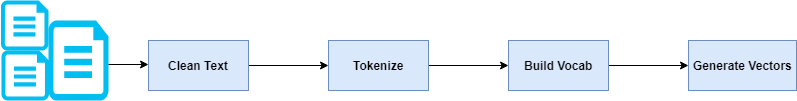

# Create sentences
<hr style = "border:2px solid black" ></hr>

In [4]:
# Write the sentences in the corpus,in our case, just two 
string1 = "Welcome to Great Learning , Now start learning"
string2 = "Learning is a good practice"
string3 =  "This is a good job. I will not miss it for anything"
string4 = "This is not good at all"

# Home made implementation
<hr style = "border:2px solid black" ></hr>

In [5]:
def vectorize(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector = []
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector


def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats. Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]


# create a list of stopwords.You can import stopwords from nltk too
# print(stopwordsNLTK)
stopwords = stopwordsNLTK  # ["to","is","a"]

# list of special characters.You can use regular expressions too
special_char = [",", ":", " ", ";", ".", "?"]


# convert them to lower case
string1 = string1.lower()
string2 = string2.lower()

# split the sentences into tokens
tokens1 = string1.split()
tokens2 = string2.split()
print(tokens1)
print(tokens2)

# create a vocabulary list
vocab = unique(tokens1+tokens2)
print("vocabulary", vocab)

# filter the vocabulary list
filtered_vocab = []
for w in vocab:
    if w not in stopwords and w not in special_char:
        filtered_vocab.append(w)
print("Filterede vocabulary", filtered_vocab)

# convert sentences into vectords
vector1 = vectorize(tokens1)
print("vectorise version", vector1)
vector2 = vectorize(tokens2)
print("vectorise version", vector2)

['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'learning']
['learning', 'is', 'a', 'good', 'practice']
vocabulary ['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'is', 'a', 'good', 'practice']
Filterede vocabulary ['welcome', 'great', 'learning', 'start', 'good', 'practice']
vectorise version [1, 1, 2, 1, 0, 0]
vectorise version [0, 0, 1, 0, 1, 1]


# Implementation with sklearn
<hr style = "border:2px solid black" ></hr>

In [6]:
"""
unigram ngram_range=(1,1)
bigrams ngram_range=(2,2)
"""

'\nunigram ngram_range=(1,1)\nbigrams ngram_range=(2,2)\n'

In [7]:
CountVec = CountVectorizer(ngram_range=(1, 1), 
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([string1, string2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(), columns=CountVec.get_feature_names())
cv_dataframe

,good,great,learning,practice,start,welcome
0,0,1,2,0,1,1
1,1,0,1,1,0,0


<div class="alert alert-block alert-info">
<font color=black>

- One hot encoding, BoW and TF-IDF treat words as independent units. 
- There is no notion of phrases or word ordering. 
- Bag of Ngrams (BoN) approach tries to remedy this. It does so by breaking text into chunks of n countigous words/tokens. 
- This can help us capture some context, which earlier approaches could not do. Let us see how it works using the same toy corpus we used in earlier examples.
- Note that the number of features (and hence the size of the feature vector) increased a lot for the same data, compared to the ther single word based representations!! 

</font>
</div>

In [9]:
CountVec = CountVectorizer(ngram_range=(1, 2), 
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([string1, string2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(), columns=CountVec.get_feature_names())
cv_dataframe

,good,good practice,great,great learning,learning,learning good,learning start,practice,start,start learning,welcome,welcome great
0,0,0,1,1,2,0,1,0,1,1,1,1
1,1,1,0,0,1,1,0,1,0,0,0,0


# BoW with binary vectors
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-info">
<font color=black>

- In the above code, we represented the text considering the frequency of words into account. 
- However, sometimes, we don't care about frequency much, but only want to know whether a word appeared in a text or not. 
- That is, each document is represented as a vector of 0s and 1s. 
- We will use the option binary=True in CountVectorizer for this purpose.

</font>
</div>

In [11]:
CountVec = CountVectorizer(ngram_range=(1, 1), stop_words='english', binary=True)
#transform
Count_data = CountVec.fit_transform([string1, string2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(), columns=CountVec.get_feature_names())
cv_dataframe

,good,great,learning,practice,start,welcome
0,0,1,1,0,1,1
1,1,0,1,1,0,0


# Creating n-grams
<hr style = "border:2px solid black" ></hr>

In [12]:
# create a list of stopwords.You can import stopwords from nltk too
# print(stopwordsNLTK)
stopwords = stopwordsNLTK  # ["to","is","a"]

# list of special characters.You can use regular expressions too
special_char = [",", ":", " ", ";", ".", "?"]


# convert them to lower case
string1 = string3.lower()
string2 = string4.lower()

# split the sentences into tokens
tokens1 = string3.split()
tokens2 = string4.split()
print(tokens1)
print(tokens2)

# create a vocabulary list
vocab = unique(tokens1+tokens2)
print("vocabulary", vocab)

# filter the vocabulary list
filtered_vocab = []
for w in vocab:
    if w not in stopwords and w not in special_char:
        filtered_vocab.append(w)
print("Filterede vocabulary", filtered_vocab)

# convert sentences into vectords
vector1 = vectorize(tokens1)
print("vectorise version", vector1)
vector2 = vectorize(tokens2)
print("vectorise version", vector2)

['This', 'is', 'a', 'good', 'job.', 'I', 'will', 'not', 'miss', 'it', 'for', 'anything']
['This', 'is', 'not', 'good', 'at', 'all']
vocabulary ['This', 'is', 'a', 'good', 'job.', 'I', 'will', 'not', 'miss', 'it', 'for', 'anything', 'at', 'all']
Filterede vocabulary ['This', 'good', 'job.', 'I', 'miss', 'anything']
vectorise version [1, 1, 1, 1, 1, 1]
vectorise version [1, 1, 0, 0, 0, 0]


# Feature Extraction with Tf-Idf vectorizer
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-info">
<font color=black>

- Tf-Idf = term frequency-inverse document frequency
- Note that the 1 added in the above formula is so that terms with zero IDF don’t get suppressed entirely.
- This process is known as IDF smoothing.

</font>
</div>

In [14]:
# without smooth IDF
print("Without Smoothing:")
# define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True,
                             smooth_idf=False,
                             ngram_range=(1, 1), stop_words='english')
# transform
tf_idf_data = tf_idf_vec.fit_transform([string3, string4])

# create dataframe
tf_idf_dataframe = pd.DataFrame(
    tf_idf_data.toarray(), columns=tf_idf_vec.get_feature_names())
print(tf_idf_dataframe)
print("\n")

# with smooth
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,
                                    smooth_idf=True,
                                    ngram_range=(1, 1), stop_words='english')

tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform([string3, string4])

print("With Smoothing:")
tf_idf_dataframe_smooth = pd.DataFrame(
    tf_idf_data_smooth.toarray(), columns=tf_idf_vec_smooth.get_feature_names())
print(tf_idf_dataframe_smooth)

Without Smoothing:
       good       job      miss
0  0.385372  0.652491  0.652491
1  1.000000  0.000000  0.000000


With Smoothing:
       good       job      miss
0  0.449436  0.631667  0.631667
1  1.000000  0.000000  0.000000


<div class="alert alert-block alert-info">
<font color=black>

- In all the other approaches we saw so far, all the words in the text are treated equally important. 
- There is no notion of some words in the document being more important than others. 
- TF-IDF addresses this issue. 
- It aims to quantify the importance of a given word relative to other words in the document and in the corpus. 
- It was commonly used representation scheme for information retrieval systems, for extracting relevant documents from a corpus for given text query.

</font>
</div>

In [16]:
documents = ["Dog bites man.", "Man bites dog.",
             "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".", "") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [17]:
tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

In [18]:
# IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)

IDF for all words in the vocabulary [1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]
----------


In [19]:
# All words in the vocabulary.
print("All words in the vocabulary", tfidf.get_feature_names())
print("-"*10)

All words in the vocabulary ['bites', 'dog', 'eats', 'food', 'man', 'meat']
----------


In [20]:
# TFIDF representation for all documents in our corpus
print("TFIDF representation for all documents in our corpus\n",
      bow_rep_tfidf.toarray())
print("-"*10)

TFIDF representation for all documents in our corpus
 [[0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.         0.44809973 0.55349232 0.         0.         0.70203482]
 [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]]
----------


In [21]:
temp = tfidf.transform(["dog and man are friends"])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

Tfidf representation for 'dog and man are friends':
 [[0.         0.70710678 0.         0.         0.70710678 0.        ]]


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-warning">
<font color=black>

- https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/
- https://github.com/practical-nlp/practical-nlp/blob/master/Ch3/02_Bag_of_Words.ipynb
- https://github.com/practical-nlp/practical-nlp/blob/master/Ch3/04_TF_IDF.ipynb

</font>
</div>